# Box Spread Exploratory Data Analysis

First start by analyzing the data. There are two sets of data called  <br>
1. BoxSpread.parquet
2. IntlBoxSpread.parquet

## Packages

In [34]:
import os
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from   matplotlib.ticker import FuncFormatter

from DataCollect import BoxSpreadData

## Box Spread Data

In [28]:
df_spread = BoxSpreadData().get_box_spread()

Start by comparing box rate vs government rate by tenor respectively

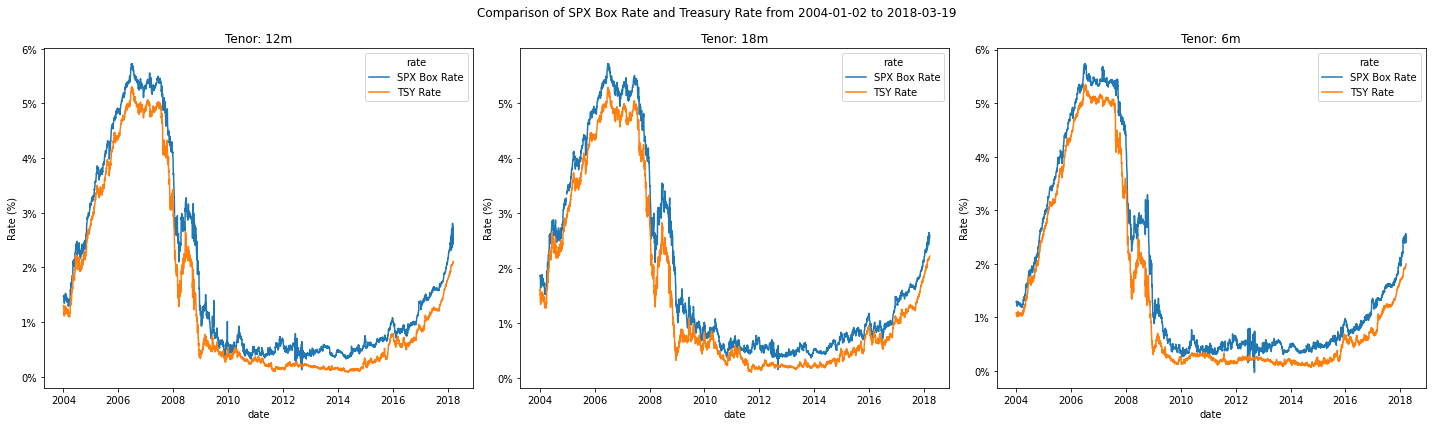

In [29]:
def plot_rate_comparison(df_box: pd.DataFrame) -> pd.DataFrame:

    tenors = df_box.tenor.drop_duplicates().sort_values().to_list()
    fig, axes = plt.subplots(ncols = len(tenors), figsize = (20,6))

    for tenor, ax in zip(tenors, axes.flatten()):

        (df_box.query(
            "tenor == @tenor").
            set_index("date")
            [["box", "gov"]].
            rename(columns = {
                "box": "SPX Box Rate",
                "gov": "TSY Rate"}).
            plot(
                ax = ax,
                title = "Tenor: {}".format(tenor),
                ylabel = "Rate (%)"))
        
        ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.0f}%'))

    fig.suptitle("Comparison of SPX Box Rate and Treasury Rate from {} to {}".format(
        df_box.date.min(),
        df_box.date.max()))

    plt.tight_layout()

plot_rate_comparison(df_spread)

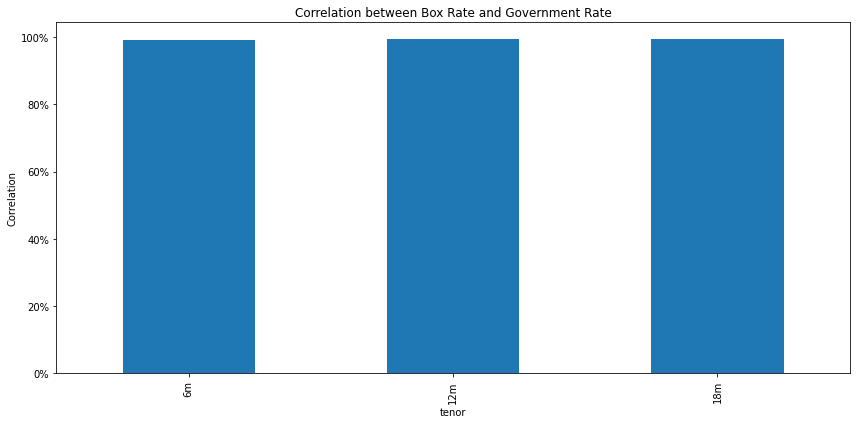

In [48]:
def plot_cross_correlation(df_spread: pd.DataFrame) -> plt.Figure: 
    
    fig, axes = plt.subplots(figsize = (12,6))

    (df_spread.drop(
        columns = ["spread", "date"]).
        groupby("tenor").
        agg("corr").
        reset_index().
        query("box != 1").
        rename(columns = {"box": "Correlation"}).
        assign(order = lambda x: x.tenor.str.replace("m", "").astype(int)).
        sort_values("order").
        set_index("tenor")
        [["Correlation"]].
        plot(
            ax     = axes,
            kind   = "bar",
            legend = False,
            ylabel = "Correlation",
            title  = "Correlation between Box Rate and Government Rate"))

    axes.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x * 100:.0f}%'))
    plt.tight_layout()
    
plot_cross_correlation(df_spread)

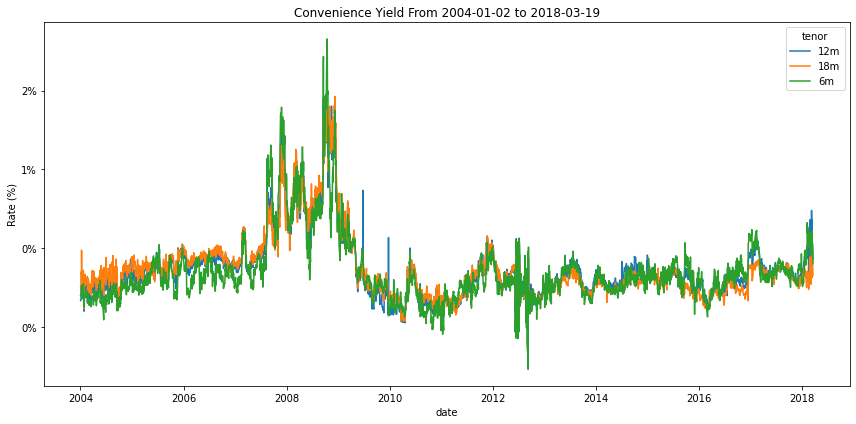

In [30]:
def plot_box_spread(df_box_spread: pd.DataFrame) -> pd.DataFrame: 
    
    _, axes = plt.subplots(figsize = (12,6))

    (df_box_spread.drop(
        columns = ["box", "gov"]).
        pivot(index = "date", columns = "tenor", values = "spread").
        plot(
            ax = axes,
            ylabel = "Rate (%)",
            title = "Convenience Yield From {} to {}".format(
                df_box_spread.date.min(),
                df_box_spread.date.max())))

    axes.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.0f}%'))
    plt.tight_layout()

plot_box_spread(BoxSpreadData().get_box_spread())

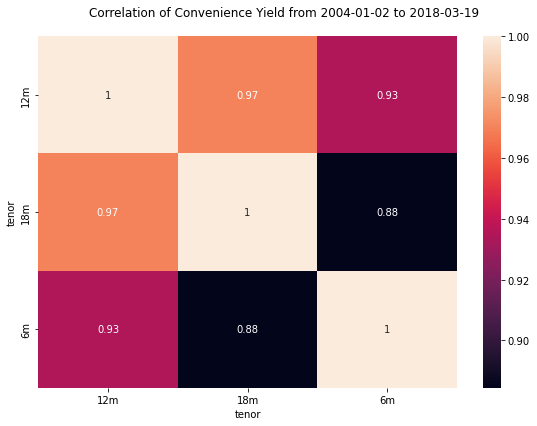

In [35]:
def plot_convenience_yield_correlation(df_box: pd.DataFrame) -> plt.Figure:

    df_corr = (df_box[
        ["date", "tenor", "spread"]].
        pivot(index = "date", columns = "tenor", values = "spread").
        corr())

    fig, axes = plt.subplots(figsize = (8,6))
    sns.heatmap(
        data = df_corr,
        ax = axes,
        annot = True)

    fig.suptitle("Correlation of Convenience Yield from {} to {}".format(
        df_box.date.min(),
        df_box.date.max()))
    
    plt.tight_layout()
    
plot_convenience_yield_correlation(df_spread)